In [ ]:
import pandas as pd
import json
import numpy as np
from datetime import datetime 

In [ ]:
data = json.load(open('changed_pollutants2'))

In [ ]:
df = pd.DataFrame(data)
df.head()

,Date,Time,Station,Pollutants,PM2.5_avg,PM2.5_max,PM2.5_min,PM10_avg,PM10_max,PM10_min,NO2_avg,NO2_max,NO2_min,NH3_avg,NH3_max,NH3_min,SO2_avg,SO2_max,SO2_min,CO_avg,CO_max,CO_min,OZONE_avg,OZONE_max,OZONE_min,_avg,_max,_min
0,08/03/2020,20:00,"Alipur, Delhi - DPCC","[[PM2.5, 117, 32, 314], [PM10, 86, 29, 178], [...",117,32,314,86,29,178,45,29,76,5,4,7,13,4,20,,-,-,40,3,53,,,
1,08/03/2020,0:00,"Alipur, Delhi - DPCC","[[PM2.5, 72, 22, 163], [PM10, 66, 14, 126], [N...",72,22,163,66,14,126,40,30,64,5,4,6,14,10,21,41,30,55,30,6,55,,,
2,08/03/2020,4:00,"Alipur, Delhi - DPCC","[[PM2.5, 83, 27, 163], [PM10, 76, 24, 126], [N...",83,27,163,76,24,126,41,30,64,5,4,6,14,10,21,48,30,55,12,3,55,,,
3,08/03/2020,8:00,"Alipur, Delhi - DPCC","[[PM2.5, 92, 30, 163], [PM10, 82, 31, 126], [N...",92,30,163,82,31,126,41,30,64,5,4,6,12,4,19,,-,-,4,3,55,,,
4,08/03/2020,12:00,"Alipur, Delhi - DPCC","[[PM2.5, 115, 58, 260], [PM10, 92, 53, 141], [...",115,58,260,92,53,141,46,30,76,5,4,7,11,4,19,,-,-,8,3,55,,,


In [ ]:
df.shape

(18360, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        18360 non-null  object
 1   Time        18360 non-null  object
 2   Station     18360 non-null  object
 3   Pollutants  18360 non-null  object
 4   PM2.5_avg   15409 non-null  object
 5   PM2.5_max   15409 non-null  object
 6   PM2.5_min   15409 non-null  object
 7   PM10_avg    13888 non-null  object
 8   PM10_max    13888 non-null  object
 9   PM10_min    13888 non-null  object
 10  NO2_avg     15326 non-null  object
 11  NO2_max     15326 non-null  object
 12  NO2_min     15326 non-null  object
 13  NH3_avg     12125 non-null  object
 14  NH3_max     12125 non-null  object
 15  NH3_min     12125 non-null  object
 16  SO2_avg     12492 non-null  object
 17  SO2_max     12492 non-null  object
 18  SO2_min     12492 non-null  object
 19  CO_avg      15295 non-null  object
 20  CO_max

In [ ]:
df.describe(include='all')

,Date,Time,Station,Pollutants,PM2.5_avg,PM2.5_max,PM2.5_min,PM10_avg,PM10_max,PM10_min,NO2_avg,NO2_max,NO2_min,NH3_avg,NH3_max,NH3_min,SO2_avg,SO2_max,SO2_min,CO_avg,CO_max,CO_min,OZONE_avg,OZONE_max,OZONE_min,_avg,_max,_min
count,18360,18360,18360,18360,15409,15409,15409,13888,13888,13888,15326,15326,15326,12125,12125,12125,12492,12492,12492,15295,15295,15295,14633,14633,14633,18360,18360,18360
unique,85,6,36,15300,283,122,416,269,163,405,143,89,210,31,26,43,78,39,131,146,114,162,273,109,279,33,31,57
top,20/05/2020,20:00,"Mandir Marg, Delhi - DPCC","[[, , , ]]",,-,-,,-,-,,-,-,6,5,8,,-,-,,5,45,6,5,-,,,
freq,216,3060,510,2696,1608,1606,1606,1433,1431,1431,1523,1521,1521,1776,2023,1373,1245,1243,1243,450,1749,572,436,1107,397,18324,18304,18290


In [ ]:
df = df.apply(pd.to_numeric,errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        18360 non-null  object 
 1   Time        18360 non-null  object 
 2   Station     18360 non-null  object 
 3   Pollutants  18360 non-null  object 
 4   PM2.5_avg   13801 non-null  float64
 5   PM2.5_max   15409 non-null  object 
 6   PM2.5_min   15409 non-null  object 
 7   PM10_avg    12455 non-null  float64
 8   PM10_max    13888 non-null  object 
 9   PM10_min    13888 non-null  object 
 10  NO2_avg     13803 non-null  float64
 11  NO2_max     15326 non-null  object 
 12  NO2_min     15326 non-null  object 
 13  NH3_avg     10918 non-null  float64
 14  NH3_max     12125 non-null  object 
 15  NH3_min     12125 non-null  object 
 16  SO2_avg     11247 non-null  float64
 17  SO2_max     12492 non-null  object 
 18  SO2_min     12492 non-null  object 
 19  CO_avg      14845 non-nul

In [ ]:
df = df.drop(['Pollutants','_avg','_max','_min'],axis=1)
# df.head()

In [ ]:
cols = ['PM2.5_avg','PM2.5_max','PM2.5_min','PM10_avg','PM10_max','PM10_min','NO2_avg', \
 	'NO2_max','NO2_min','NH3_avg','NH3_max','NH3_min','SO2_avg','SO2_max','SO2_min','CO_avg', \
    	'CO_max','CO_min','OZONE_avg','OZONE_max','OZONE_min']

df[cols] = df[cols].replace(to_replace=['','-',],value=np.nan)
df

,Date,Time,Station,PM2.5_avg,PM2.5_max,PM2.5_min,PM10_avg,PM10_max,PM10_min,NO2_avg,NO2_max,NO2_min,NH3_avg,NH3_max,NH3_min,SO2_avg,SO2_max,SO2_min,CO_avg,CO_max,CO_min,OZONE_avg,OZONE_max,OZONE_min
0,08/03/2020,20:00,"Alipur, Delhi - DPCC",117,32,314,86,29,178,45,29,76,5,4,7,13,4,20,NaN,NaN,NaN,40,3,53
1,08/03/2020,0:00,"Alipur, Delhi - DPCC",72,22,163,66,14,126,40,30,64,5,4,6,14,10,21,41,30,55,30,6,55
2,08/03/2020,4:00,"Alipur, Delhi - DPCC",83,27,163,76,24,126,41,30,64,5,4,6,14,10,21,48,30,55,12,3,55
3,08/03/2020,8:00,"Alipur, Delhi - DPCC",92,30,163,82,31,126,41,30,64,5,4,6,12,4,19,NaN,NaN,NaN,4,3,55
4,08/03/2020,12:00,"Alipur, Delhi - DPCC",115,58,260,92,53,141,46,30,76,5,4,7,11,4,19,NaN,NaN,NaN,8,3,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,31/05/2020,0:00,"Wazirpur, Delhi - DPCC",42,18,80,59,22,104,35,27,48,10,9,13,23,20,27,72,38,100,9,4,16
18356,31/05/2020,4:00,"Wazirpur, Delhi - DPCC",48,18,80,62,25,104,34,22,43,9,8,10,23,20,27,82,38,100,6,3,16
18357,31/05/2020,8:00,"Wazirpur, Delhi - DPCC",49,13,80,64,23,104,32,17,43,9,8,10,23,20,27,78,38,100,4,3,16
18358,31/05/2020,12:00,"Wazirpur, Delhi - DPCC",47,13,80,59,23,104,32,17,43,NaN,NaN,NaN,23,20,27,68,38,100,4,3,16


In [ ]:
# df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
df[cols] = df[cols].apply(pd.to_numeric)
df_nan = df[df[cols].isnull().all(axis=1)]

In [ ]:
df_nan

,Date,Time,Station,PM2.5_avg,PM2.5_max,PM2.5_min,PM10_avg,PM10_max,PM10_min,NO2_avg,NO2_max,NO2_min,NH3_avg,NH3_max,NH3_min,SO2_avg,SO2_max,SO2_min,CO_avg,CO_max,CO_min,OZONE_avg,OZONE_max,OZONE_min
96,2020-08-03,20:00,"Mandir Marg, Delhi - DPCC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2020-08-03,8:00,"Mandir Marg, Delhi - DPCC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,2020-08-03,12:00,"Mandir Marg, Delhi - DPCC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2020-08-03,16:00,"Mandir Marg, Delhi - DPCC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,2020-08-03,20:00,"Mundka, Delhi - DPCC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,2020-05-31,12:00,"Pusa, Delhi - IMD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18311,2020-05-31,16:00,"Pusa, Delhi - IMD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18313,2020-05-31,0:00,"R K Puram, Delhi - DPCC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18319,2020-05-31,0:00,"Rohini, Delhi - DPCC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_not_nan = df[~df[cols].isnull().all(axis=1)]
df_not_nan

,Date,Time,Station,PM2.5_avg,PM2.5_max,PM2.5_min,PM10_avg,PM10_max,PM10_min,NO2_avg,NO2_max,NO2_min,NH3_avg,NH3_max,NH3_min,SO2_avg,SO2_max,SO2_min,CO_avg,CO_max,CO_min,OZONE_avg,OZONE_max,OZONE_min
0,2020-08-03,20:00,"Alipur, Delhi - DPCC",117.0,32.0,314.0,86.0,29.0,178.0,45.0,29.0,76.0,5.0,4.0,7.0,13.0,4.0,20.0,NaN,NaN,NaN,40.0,3.0,53.0
1,2020-08-03,0:00,"Alipur, Delhi - DPCC",72.0,22.0,163.0,66.0,14.0,126.0,40.0,30.0,64.0,5.0,4.0,6.0,14.0,10.0,21.0,41.0,30.0,55.0,30.0,6.0,55.0
2,2020-08-03,4:00,"Alipur, Delhi - DPCC",83.0,27.0,163.0,76.0,24.0,126.0,41.0,30.0,64.0,5.0,4.0,6.0,14.0,10.0,21.0,48.0,30.0,55.0,12.0,3.0,55.0
3,2020-08-03,8:00,"Alipur, Delhi - DPCC",92.0,30.0,163.0,82.0,31.0,126.0,41.0,30.0,64.0,5.0,4.0,6.0,12.0,4.0,19.0,NaN,NaN,NaN,4.0,3.0,55.0
4,2020-08-03,12:00,"Alipur, Delhi - DPCC",115.0,58.0,260.0,92.0,53.0,141.0,46.0,30.0,76.0,5.0,4.0,7.0,11.0,4.0,19.0,NaN,NaN,NaN,8.0,3.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18355,2020-05-31,0:00,"Wazirpur, Delhi - DPCC",42.0,18.0,80.0,59.0,22.0,104.0,35.0,27.0,48.0,10.0,9.0,13.0,23.0,20.0,27.0,72.0,38.0,100.0,9.0,4.0,16.0
18356,2020-05-31,4:00,"Wazirpur, Delhi - DPCC",48.0,18.0,80.0,62.0,25.0,104.0,34.0,22.0,43.0,9.0,8.0,10.0,23.0,20.0,27.0,82.0,38.0,100.0,6.0,3.0,16.0
18357,2020-05-31,8:00,"Wazirpur, Delhi - DPCC",49.0,13.0,80.0,64.0,23.0,104.0,32.0,17.0,43.0,9.0,8.0,10.0,23.0,20.0,27.0,78.0,38.0,100.0,4.0,3.0,16.0
18358,2020-05-31,12:00,"Wazirpur, Delhi - DPCC",47.0,13.0,80.0,59.0,23.0,104.0,32.0,17.0,43.0,NaN,NaN,NaN,23.0,20.0,27.0,68.0,38.0,100.0,4.0,3.0,16.0


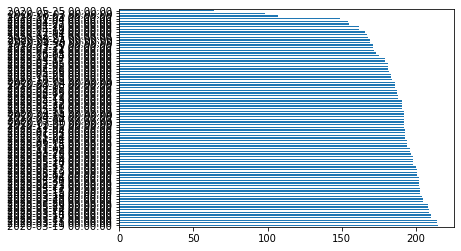

In [ ]:
df_not_nan['Date'].value_counts().plot(kind='barh')

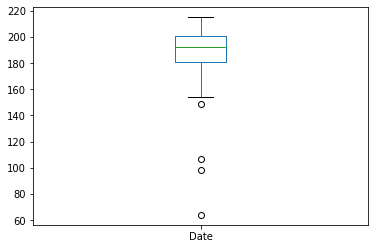

In [ ]:
df_not_nan['Date'].value_counts().plot(kind='box')

In [ ]:
# df_not_nan[['PM2.5_avg']].max(axis=1)

In [ ]:
# df_not_nan = df_not_nan.replace(to_replace='',value=np.nan)
# df_not_nan

In [ ]:
# df_not_nan.loc[0,['PM2.5_avg','NO2_avg',]].min()

'117'

In [ ]:
# try_df = df_not_nan.fillna("")
# try_df[avg_cols] = try_df[avg_cols].apply(pd.to_numeric)
# try_df.loc[0,avg_cols].max()

117.0

In [ ]:
avg_cols = ['PM2.5_avg','NO2_avg','NH3_avg','SO2_avg','CO_avg','OZONE_avg',]
# df_not_nan[avg_cols] = df_not_nan[avg_cols].apply(pd.to_numeric)
df_not_nan['Aqi'] = df_not_nan[avg_cols].max(axis=1,skipna=True)
# df_not_nan['Aqi'] = df_not_nan[avg_cols].max(axis=1,skipna = True,numeric_only=True)
# df_not_nan.head()
# df_not_nan.drop(['Aqi'],axis=1)
# df_not_nan['Aqi'] = np.nanmax(df_not_nan[avg_cols])
df_not_nan
# df_not_nan.columns
df_not_nan.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date            0
Time            0
Station         0
PM2.5_avg    1466
PM2.5_max    1468
PM2.5_min    1469
PM10_avg     2812
PM10_max     2814
PM10_min     2815
NO2_avg      1464
NO2_max      1466
NO2_min      1467
NH3_avg      4349
NH3_max      4351
NH3_min      4352
SO2_avg      4020
SO2_max      4022
SO2_min      4023
CO_avg        422
CO_max        425
CO_min        425
OZONE_avg    1033
OZONE_max    1036
OZONE_min    1036
Aqi             0
dtype: int64

In [ ]:
from collections import OrderedDict
time_grouped = df_not_nan.groupby(['Time'])

# for name,group in date_time_grouped:
#   print(name)
#   print(group)

aqi_by_time = {}
for name,group in time_grouped:
  aqi_means = {}
  # print(name)
  date_grouped = group.groupby(['Date'])
  # one_group = date_grouped.get_group('08/03/2020')
  # print(one_group['Aqi'].mean())
  # print(date_grouped.get_group('08/03/2020'))
  # print(date_grouped.first())
  for date,date_group in date_grouped:
    # aqi_means.append(date_group['Aqi'].mean())
    # print(date_group['Date'])
    
    aqi_means[date] = date_group['Aqi'].mean()

  # print(aqi_means)
  aqi_by_time[name] = aqi_means

# print(OrderedDict(aqi_by_time['0:00']))
# print(aqi_by_time['4:00'])
# print(aqi_by_time['8:00'])
# print(aqi_by_time['12:00'])
# print(aqi_by_time['16:00'])
# print(aqi_by_time['20:00'])
      

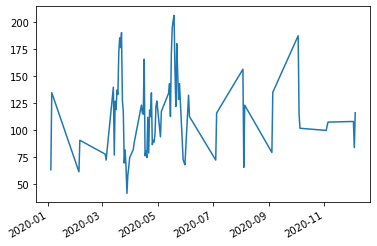

In [ ]:
# !pip install ipympl
# import ipympl
# %matplotlib widget
from datetime import datetime
import matplotlib.pyplot as plt

mydict = aqi_by_time['16:00']
# date_objects = [datetime.strptime(date,'%d/%m/%Y').date() for date in sorted(mydict)]
# values = [mydict[key] for key in sorted(mydict)]

date_objects,values = zip(*sorted(mydict.items()))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(date_objects,values)
fig.autofmt_xdate()
plt.show()
# plt.plot(date_objects,values)
# plt.xticks(date_objects, values, rotation='vertical')

In [ ]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


[Timestamp('2020-04-04 00:00:00'), Timestamp('2020-04-05 00:00:00'), Timestamp('2020-04-13 00:00:00'), Timestamp('2020-04-14 00:00:00'), Timestamp('2020-04-15 00:00:00'), Timestamp('2020-04-16 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-04-18 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-04-20 00:00:00'), Timestamp('2020-04-21 00:00:00'), Timestamp('2020-04-22 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-04-26 00:00:00'), Timestamp('2020-04-27 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-04-30 00:00:00')]
[75.02083333333333, 70.01298701298701, 106.94764397905759, 116.02906976744185, 111.390625, 145.31550802139037, 94.73184357541899, 71.43548387096774, 66.84567901234568, 103.69633507853403, 79.1547619047619, 101.7127659574468, 111.56930693069307, 119.16831683168317, 96.75956284153006, 83.11049723756906, 76.3032258064516

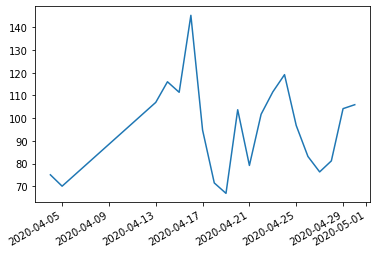

In [ ]:
from matplotlib.dates import DateFormatter
grouped = df_not_nan.groupby(['Date'])
dates = []
aqi_means_date = []
for date,group in grouped:
  if date >= datetime.date(datetime(2020,4,1)) and date <= datetime.date(datetime(2020,4,30)):
    dates.append(date)
    aqi_means_date.append(group['Aqi'].mean())

print(dates)
print(aqi_means_date)
# plt.plot()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sorted(dates),[y for _,y in sorted(zip(dates,aqi_means_date))])
# plt.bar(sorted(dates),[y for _,y in sorted(zip(dates,aqi_means_date))])
fig.autofmt_xdate()
# ax.fmt_xdata = 
# date_form = DateFormatter('%m-%d')
# ax.xaxis.set_major_formatter(date_form)
# ax.xaxis.set_ticks(sorted(dates))
# ax.set_xticklabels(sorted(dates))
plt.show()
